# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Ginanti Riski
- Email: a788xbm186@devacademy.id
- Id Dicoding: a788xbm186

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from scipy.stats.mstats import winsorize
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Menyiapkan data yang akan digunakan

In [2]:
df = pd.read_csv('df.csv')

## Data Understanding

Berdasarkan data yg ada tidak terlihat data yang missing, karena jumlah data keseluruhan fitur sudah seragam, dan keseluruhan fitur sudah dalam bentuk numerik, kecuali target sehingga kita tidak perlu lakukan encoding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

**🎓 Profil Umum Mahasiswa**

Mayoritas Mahasiswa Belum Menikah
Kolom Marital_status memiliki nilai minimum 1 dan maksimum 6 dengan rata-rata 1.18, menunjukkan sebagian besar mahasiswa belum menikah (diasumsikan 1 = belum menikah).

Sebagian Besar Mengikuti Kelas Siang
Kolom Daytime_evening_attendance memiliki mean 0.89, mendekati 1 (diasumsikan 1 = kelas siang), menandakan mayoritas mahasiswa kuliah pada siang hari.

Rata-rata Mode Pendaftaran = 18.6
Pada Application_mode, nilai sangat tersebar luas (1–57), tapi sebagian besar berasal dari kategori awal (Q1 dan median = 1 & 17). Hal ini menunjukkan ada berbagai cara mahasiswa mendaftar, namun sebagian besar menggunakan jalur tertentu yang dominan.

---

**📚 Kualifikasi Sebelumnya dan Orang Tua**

Kualifikasi Sebelumnya Umumnya Rendah
Kolom Previous_qualification memiliki rata-rata 4.57 dengan standar deviasi tinggi (10.2) dan nilai maksimum mencapai 43, menandakan adanya variasi besar dalam latar belakang pendidikan.

Rata-rata Nilai Kualifikasi Sebelumnya adalah 132.6, dengan sebaran antar siswa yang cukup lebar (SD = 13.18), menunjukkan beragamnya performa akademik awal.

Orang Tua Umumnya Memiliki Kualifikasi Dasar
Mothers_qualification dan Fathers_qualification rata-rata sekitar 19–22, menunjukkan sebagian besar orang tua tidak memiliki pendidikan tinggi.

---

**📊 Performa Akademik Mahasiswa**

Jumlah Unit Semester 1 yang Tidak Dievaluasi sangat kecil (mean = 0.13), menunjukkan bahwa sebagian besar mahasiswa menyelesaikan evaluasi semester 1.

Jumlah Unit yang Disetujui di Semester 2 memiliki rata-rata 4.43 dari 6.23 yang diambil, menunjukkan bahwa mahasiswa rata-rata lulus sekitar 71% mata kuliah.

Nilai Rata-rata Semester 2 = 10.23, menandakan bahwa mahasiswa rata-rata hanya sedikit di atas ambang kelulusan (jika sistem nilainya dari 0–20 atau mirip Eropa).

---

**🌍 Faktor Eksternal Ekonomi**

Rata-rata Tingkat Pengangguran = 11.56%, yang cukup tinggi, bisa jadi berpengaruh terhadap motivasi dan kelangsungan studi mahasiswa.

Tingkat Inflasi berada pada rata-rata 1.22%, dan GDP cukup beragam dengan nilai negatif hingga positif. Ini menandakan bahwa mahasiswa belajar dalam kondisi ekonomi yang fluktuatif.

---


**📌 Kesimpulan Awal**

Mayoritas mahasiswa berasal dari latar belakang keluarga dengan pendidikan rendah dan mengikuti kuliah siang.

Mereka memiliki kinerja akademik sedang—banyak yang tidak lulus semua mata kuliah semester kedua dan nilai rata-rata hanya sedikit di atas batas minimum.

Kondisi ekonomi makro seperti tingkat pengangguran tinggi mungkin menjadi tantangan tambahan.

Kualifikasi dan nilai sebelumnya bervariasi luas, yang dapat memengaruhi kemungkinan dropout atau gagal.



In [4]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Dataset bersih dari data duplikat

In [5]:
df.duplicated().sum()

np.int64(0)

**🔍 Insight Outlier Data Mahasiswa**


📌 1. Fitur dengan Proporsi Outlier Tertinggi
Scholarship_holder (Beasiswa) memiliki 24.84% data outlier, dan seluruh outliernya adalah bukan penerima beasiswa (karena hanya nilai 0 dianggap outlier berdasarkan IQR). Ini mengindikasikan bahwa sebagian besar mahasiswa tidak menerima beasiswa, yang bisa berdampak terhadap risiko dropout atau performa akademik.

---

📌 2. Nilai Akademik Banyak Mengandung Outlier
Curricular_units_2nd_sem_grade (19.82%) dan Curricular_units_1st_sem_grade (16.41%) mengandung cukup banyak outlier. Ini berarti banyak mahasiswa memiliki nilai yang sangat rendah atau sangat tinggi, sehingga perlu dievaluasi lebih lanjut:
- Apakah mahasiswa dengan nilai ekstrem ini memiliki pola dropout?
- Apakah ada kelompok mahasiswa yang tertinggal dan butuh intervensi?

---

📌 3. Fitur Previous_qualification Memiliki Outlier Tinggi (15.98%)
Ini menunjukkan banyak mahasiswa yang masuk dengan kualifikasi yang berbeda dari mayoritas, bisa jadi mereka dari sistem pendidikan yang tidak umum atau berbeda tingkat. Ini bisa menjadi faktor risiko dalam adaptasi akademik.

---

📌 4. Jumlah Mata Kuliah yang Diambil dan Diberi Kredit juga Bermasalah
Curricular_units_1st_sem_credited (13.04%) dan Curricular_units_2nd_sem_credited (11.98%) banyak outlier — menandakan sejumlah mahasiswa tidak mengambil/mendapat kredit sama sekali, yang bisa jadi merupakan gejala awal keberhentian studi atau tidak aktif.

---

📌 5. Variabel Sosial-Ekonomi dan Status juga Punya Outlier
Variabel seperti:
- Debtor (11.37%)
- Tuition_fees_up_to_date (11.93%)
- Marital_status (11.42%)
Menunjukkan bahwa cukup banyak mahasiswa memiliki tunggakan, belum lunas SPP, atau status menikah, yang secara statistik menyimpang dari mayoritas mahasiswa. Hal ini bisa dikaitkan dengan faktor risiko ekonomi dan beban keluarga terhadap performa studi.

---

📌 6. Fitur Kursus dan Usia juga Menyimpan Anomali
Course (9.99%) dan Age_at_enrollment (9.97%) memperlihatkan adanya mahasiswa dengan program studi atau usia masuk yang tidak umum, seperti:
- Mahasiswa sangat muda atau sangat tua saat masuk,
- Atau mengikuti program non-reguler.
- Ini bisa memengaruhi pola belajar dan kelulusan.

---

📌 7. Fitur Inflasi, Pengangguran, dan GDP Tidak Ada Outlier
Fitur makroekonomi (Unemployment_rate, Inflation_rate, GDP) tidak menunjukkan outlier, yang berarti data eksternal ini relatif stabil dan tidak terlalu berisiko menimbulkan noise.

In [6]:
# Fungsi untuk mendeteksi outliers menggunakan metode IQR
def detect_outliers_iqr(df):
    outlier_info = {}
    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_info[col] = {
            "Total Outliers": len(outliers),
            "Outlier %": round(len(outliers)/len(df)*100, 2),
            "Lower Bound": lower_bound,
            "Upper Bound": upper_bound
        }
    return pd.DataFrame(outlier_info).T.sort_values(by="Outlier %", ascending=False)

# Panggil fungsi
outlier_summary = detect_outliers_iqr(df)
print(outlier_summary)

                                              Total Outliers  Outlier %  \
Scholarship_holder                                    1099.0      24.84   
Curricular_units_2nd_sem_grade                         877.0      19.82   
Curricular_units_1st_sem_grade                         726.0      16.41   
Previous_qualification                                 707.0      15.98   
Curricular_units_1st_sem_credited                      577.0      13.04   
Application_order                                      541.0      12.23   
Curricular_units_2nd_sem_credited                      530.0      11.98   
Tuition_fees_up_to_date                                528.0      11.93   
Marital_status                                         505.0      11.42   
Debtor                                                 503.0      11.37   
Daytime_evening_attendance                             483.0      10.92   
Course                                                 442.0       9.99   
Age_at_enrollment        

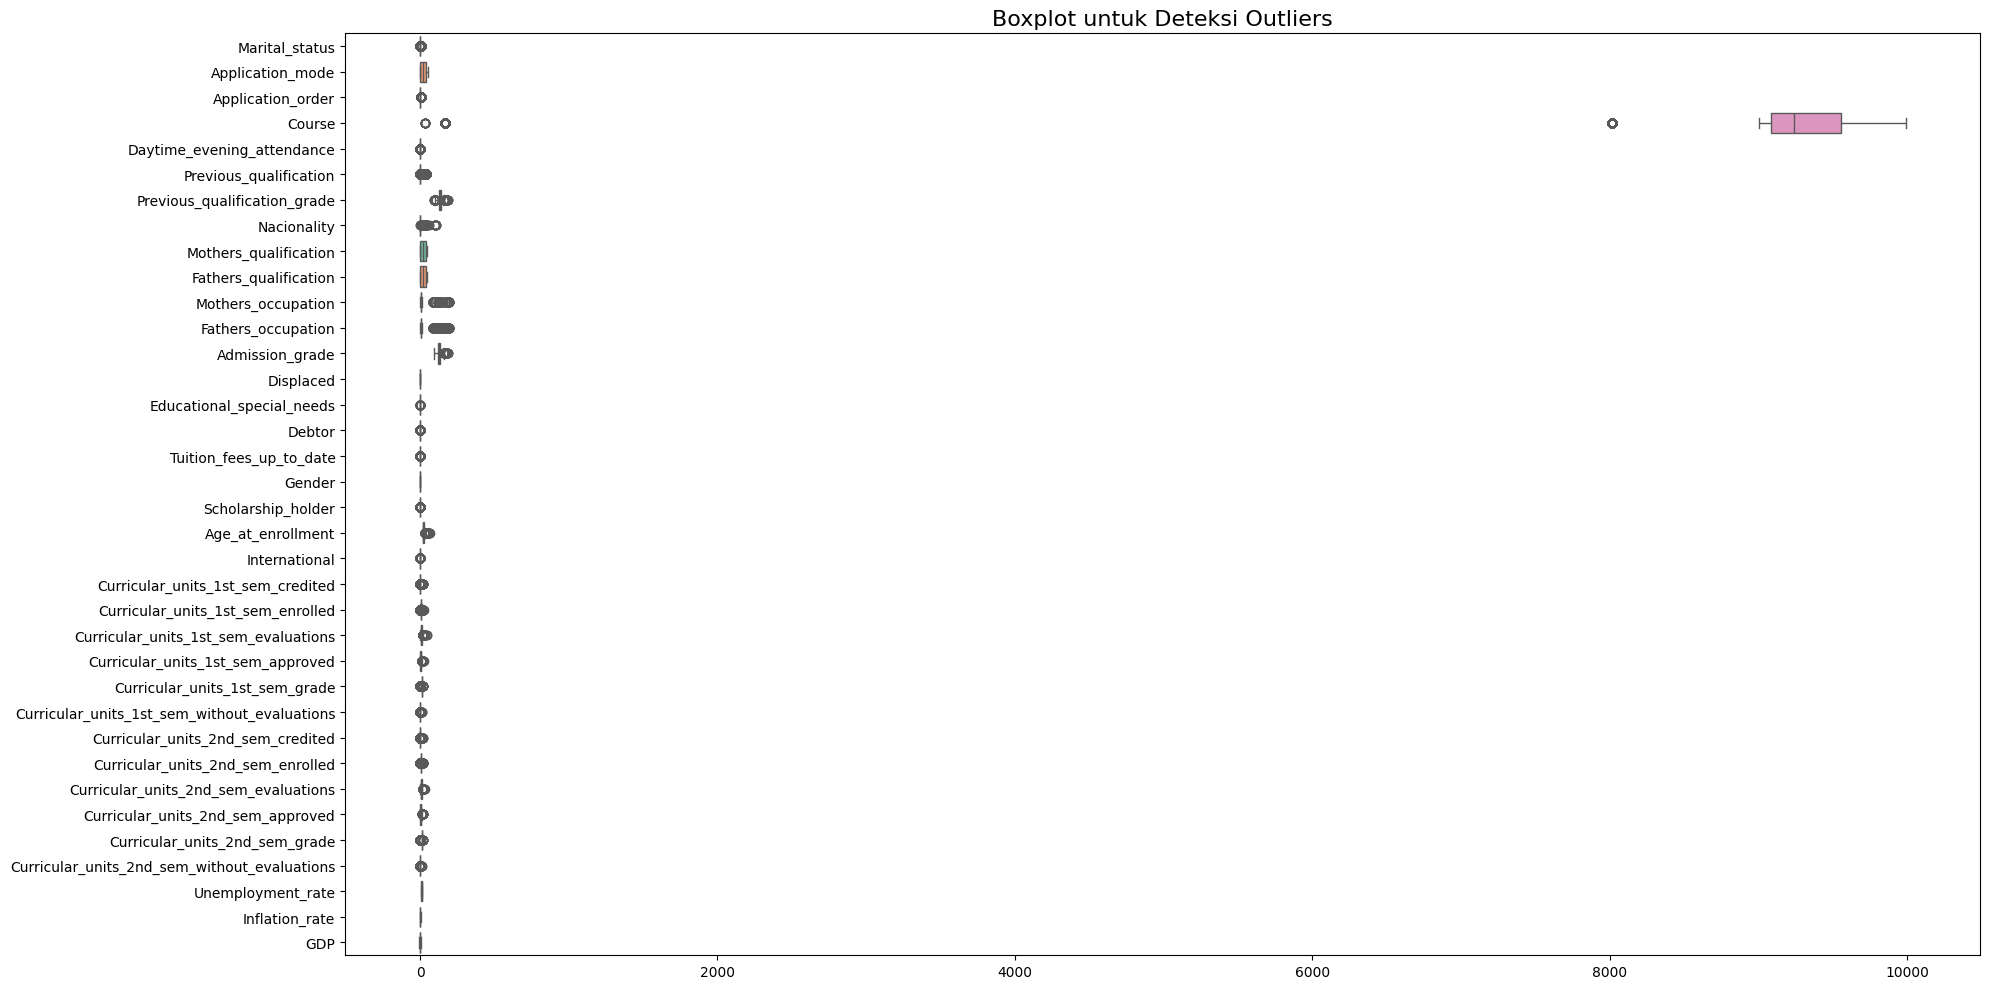

In [7]:
# Atur ukuran dan tampilkan boxplot untuk semua kolom numerik
plt.figure(figsize=(20, 10))
df_numeric = df.select_dtypes(include='number')
sns.boxplot(data=df_numeric, orient='h', palette='Set2')
plt.title("Boxplot untuk Deteksi Outliers", fontsize=16)
plt.tight_layout()
plt.show()


Terlihat distribusi data tidak seimbang satu sama lain, dengan komposisi sebagai berikut :
1. Graduate    2209
2. Dropout     1421
3. Enrolled     794

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Persentase distribusi:
Status
Graduate    49.932188
Dropout     32.120253
Enrolled    17.947559
Name: proportion, dtype: float64


<ipython-input-8-8b3c1bbf755c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=target_column, palette='pastel')


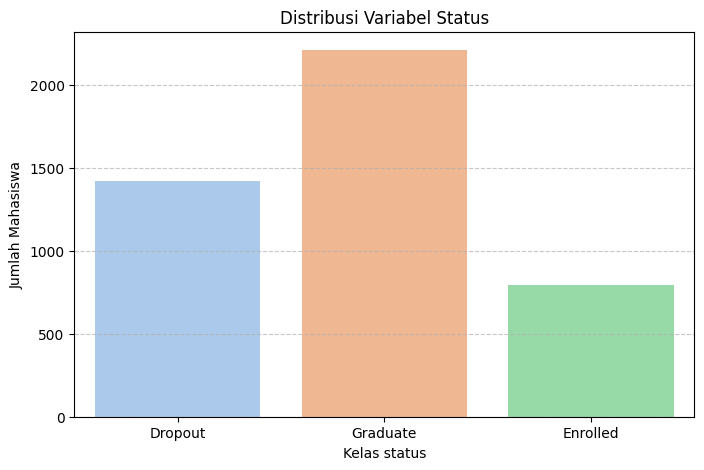

In [8]:
# Variabel Target
target_column = 'Status'

# Cek distribusi nilai unik (secara numerik)
print(df[target_column].value_counts())
print("\nPersentase distribusi:")
print(df[target_column].value_counts(normalize=True) * 100)

# Plot distribusi
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x=target_column, palette='pastel')
plt.title('Distribusi Variabel Status')
plt.xlabel('Kelas status')
plt.ylabel('Jumlah Mahasiswa')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insight Korelasi Fitur Numerik:**

Berdasarkan hasil heatmap korelasi, berikut adalah beberapa insight penting yang dapat dijadikan dasar untuk feature engineering:

**Korelasi Kuat Antar Fitur:**

- **Fitur akademik semester 1** menunjukkan korelasi sangat kuat satu sama lain:
  - `Curricular_units_1st_sem_credited`, `enrolled`, `evaluations`, `approved`, dan `grade` semuanya berkorelasi sangat tinggi (**> 0.7**).
- **Fitur akademik semester 2** juga menunjukkan pola korelasi tinggi seperti:
  - `Curricular_units_2nd_sem_credited`, `enrolled`, `evaluations`, `approved`, dan `grade` (**> 0.7**).

*Kesimpulan*: Beberapa fitur akademik sangat redundant dan bisa direduksi menggunakan salah satu per semester yang paling representatif (misalnya: `Curricular_units_1st_sem_grade` dan `Curricular_units_2nd_sem_grade`).

---

**🎓 Korelasi Menarik dengan Fitur Target Potensial (Status)**

Walaupun `Status` tidak ditampilkan langsung dalam heatmap (karena kategorikal), beberapa fitur menunjukkan potensi penting:

- `Age_at_enrollment` berkorelasi **negatif sedang** dengan:
  - `Scholarship_holder` (-0.39)
  - `Application_mode` (-0.36)

*Indikasi*: Mahasiswa lebih tua cenderung tidak menerima beasiswa dan menggunakan jalur pendaftaran yang berbeda.

---

**💸 Korelasi Ekonomi**

- `Unemployment_rate` dan `Inflation_rate` berkorelasi negatif satu sama lain (-0.34).
- `GDP` berkorelasi negatif dengan `Unemployment_rate` (-0.30), sesuai logika ekonomi bahwa kenaikan GDP menurunkan pengangguran.

---

**Korelasi Sosial Rendah**

- Variabel seperti `Fathers_occupation`, `Mothers_qualification`, `Nacionality`, `Marital_status`, dan `Gender` menunjukkan **korelasi lemah atau sangat rendah** terhadap fitur lainnya.
- Fitur-fitur ini cenderung bisa diabaikan atau dimasukkan hanya jika terbukti penting saat modeling.

---

**✅ Rekomendasi Feature Engineering**

Berdasarkan korelasi:

1. **Pilih fitur akademik utama:**
   - `Curricular_units_1st_sem_grade`
   - `Curricular_units_2nd_sem_grade`
   - atau, jumlahkan/ratakan skor semester sebagai satu fitur gabungan.

2. **Pertahankan fitur penting lainnya:**
   - `Age_at_enrollment`
   - `Scholarship_holder`
   - `GDP`, `Unemployment_rate`

3. **Drop fitur dengan korelasi sangat rendah atau redundant:**
   - Salah satu dari fitur akademik yang berkorelasi sangat tinggi.
   - Variabel sosial yang tidak memberikan sinyal jelas.

---

📌 *Langkah selanjutnya*: Gunakan fitur-fitur penting ini sebagai dasar untuk modeling klasifikasi dropout, graduate, atau enrolled.


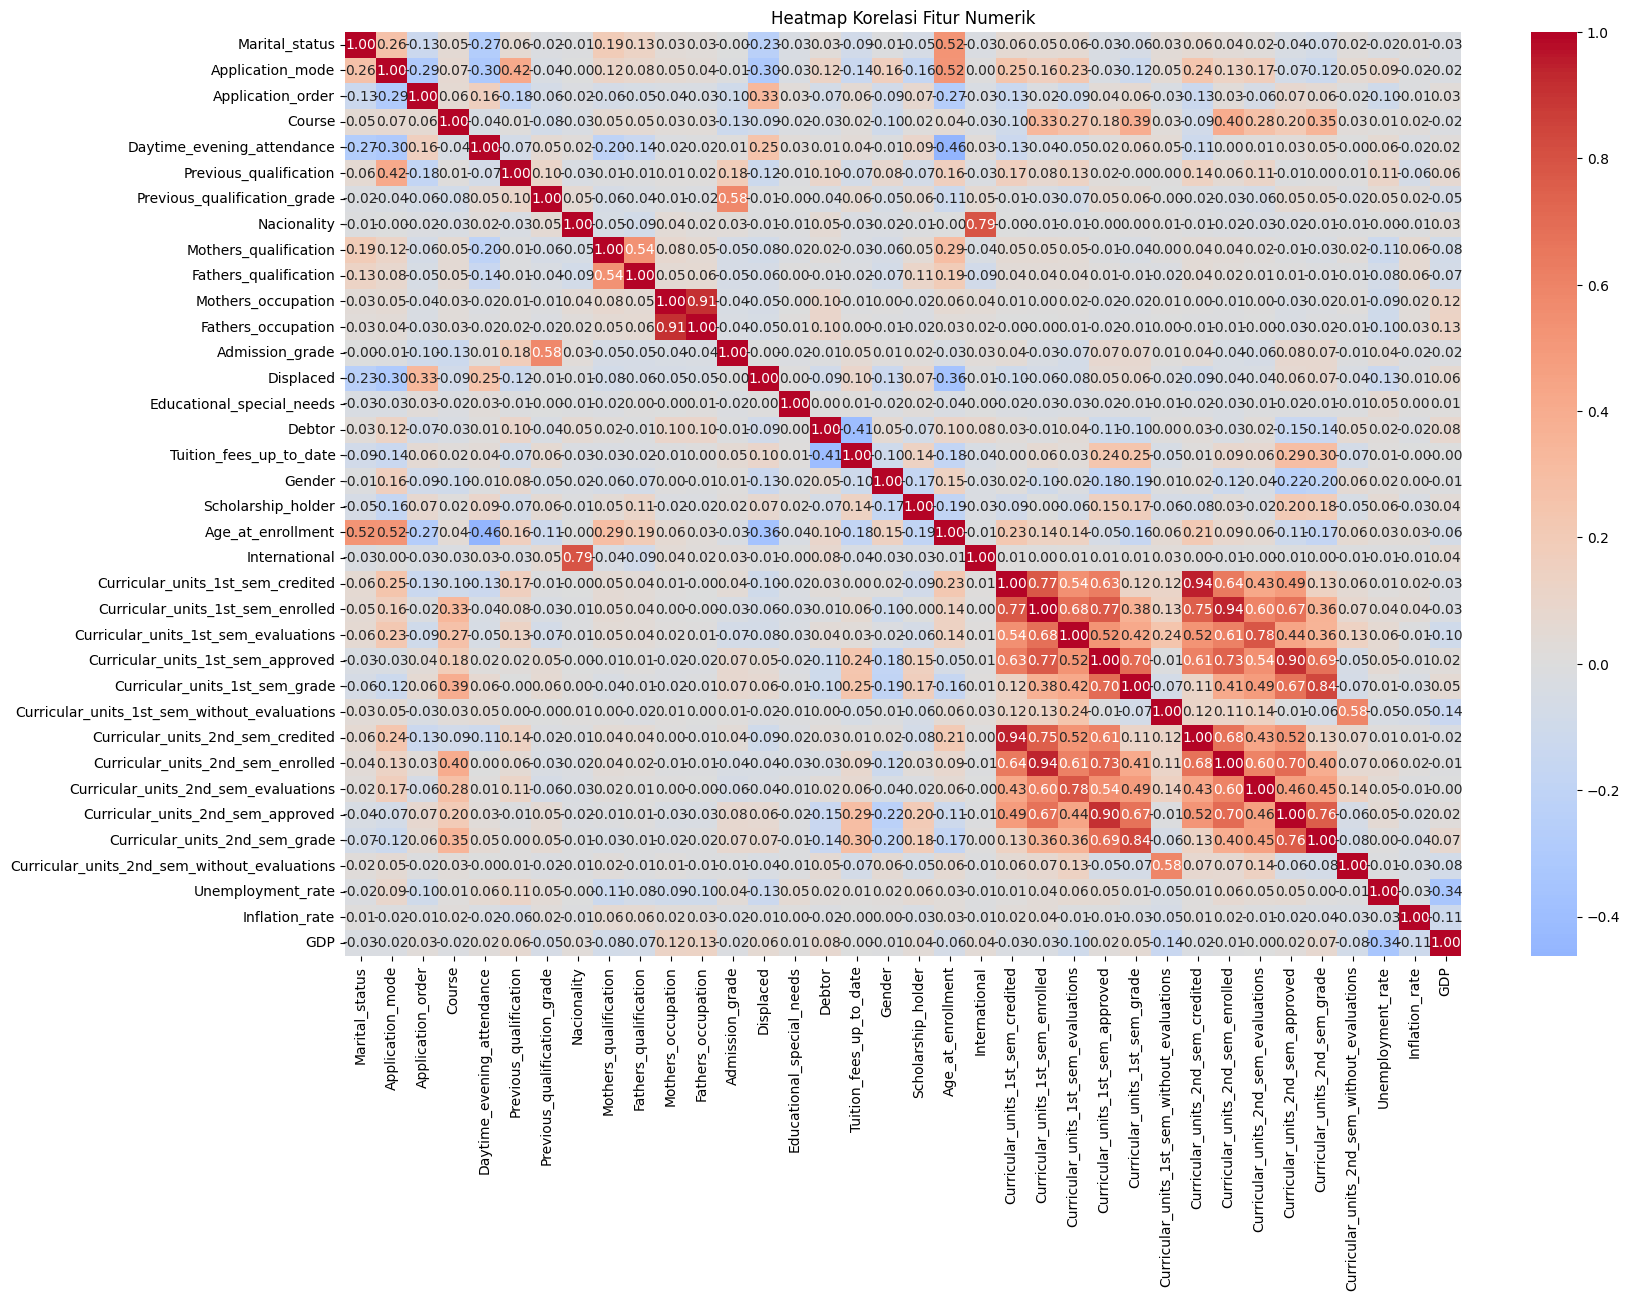

In [9]:
# Hitung korelasi hanya antar kolom numerik
correlation_matrix = df.select_dtypes(include='number').corr()


# Visualisasi heatmap korelasi
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

## Data Preparation / Preprocessing

Untuk keperluan pembuatan dashboard kita akan melakukan decode untuk variabel" yang sebenarnya kategorikal berdasarkan informasi dataset yang ada dengan mapping dibawah ini, yang misalnya:
pada `Marital_status`, angka 1 mengartikan single, angka 2 mengartikan married, dst


In [10]:
mapping = {
    'Marital_status': {
        1: 'single',
        2: 'married',
        3: 'widower',
        4: 'divorced',
        5: 'facto union',
        6: 'legally separated'
    },
    'Application_mode': {
        1: '1st phase - general contingent',
        2: 'Ordinance No. 612/93',
        5: '1st phase - special contingent (Azores Island)',
        7: 'Holders of other higher courses',
        10: 'Ordinance No. 854-B/99',
        15: 'International student (bachelor)',
        16: '1st phase - special contingent (Madeira Island)',
        17: '2nd phase - general contingent',
        18: '3rd phase - general contingent',
        26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
        27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
        39: 'Over 23 years old',
        42: 'Transfer',
        43: 'Change of course',
        44: 'Technological specialization diploma holders',
        51: 'Change of institution/course',
        53: 'Short cycle diploma holders',
        57: 'Change of institution/course (International)'
    },
    'Course': {
        33: 'Biofuel Production Technologies',
        171: 'Animation and Multimedia Design',
        8014: 'Social Service (evening attendance)',
        9003: 'Agronomy',
        9070: 'Communication Design',
        9085: 'Veterinary Nursing',
        9119: 'Informatics Engineering',
        9130: 'Equinculture',
        9147: 'Management',
        9238: 'Social Service',
        9254: 'Tourism',
        9500: 'Nursing',
        9556: 'Oral Hygiene',
        9670: 'Advertising and Marketing Management',
        9773: 'Journalism and Communication',
        9853: 'Basic Education',
        9991: 'Management (evening attendance)'
    },
    'Daytime_evening_attendance': {
        1: 'daytime',
        0: 'evening'
    },
    'Previous_qualification': {
        1: 'Secondary education',
        2: 'Higher education - bachelor\'s degree',
        3: 'Higher education - degree',
        4: 'Higher education - master\'s',
        5: 'Higher education - doctorate',
        6: 'Frequency of higher education',
        9: '12th year of schooling - not completed',
        10: '11th year of schooling - not completed',
        12: 'Other - 11th year of schooling',
        14: '10th year of schooling',
        15: '10th year of schooling - not completed',
        19: 'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
        38: 'Basic education 2nd cycle (6th/7th/8th year) or equiv.',
        39: 'Technological specialization course',
        40: 'Higher education - degree (1st cycle)',
        42: 'Professional higher technical course',
        43: 'Higher education - master (2nd cycle)'
    },
    'Nacionality': {
        1: 'Portuguese',
        2: 'German',
        6: 'Spanish',
        11: 'Italian',
        13: 'Dutch',
        14: 'English',
        17: 'Lithuanian',
        21: 'Angolan',
        22: 'Cape Verdean',
        24: 'Guinean',
        25: 'Mozambican',
        26: 'Santomean',
        32: 'Turkish',
        41: 'Brazilian',
        62: 'Romanian',
        100: 'Moldova (Republic of)',
        101: 'Mexican',
        103: 'Ukrainian',
        105: 'Russian',
        108: 'Cuban',
        109: 'Colombian'
    },
    'Mothers_qualification': {
        1: 'Secondary Education - 12th Year of Schooling or Eq.',
        2: 'Higher Education - Bachelor\'s Degree',
        3: 'Higher Education - Degree',
        4: 'Higher Education - Master\'s',
        5: 'Higher Education - Doctorate',
        6: 'Frequency of Higher Education',
        9: '12th Year of Schooling - Not Completed',
        10: '11th Year of Schooling - Not Completed',
        11: '7th Year (Old)',
        12: 'Other - 11th Year of Schooling',
        14: '10th Year of Schooling',
        18: 'General commerce course',
        19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
        22: 'Technical-professional course',
        26: '7th year of schooling',
        27: '2nd cycle of the general high school course',
        29: '9th Year of Schooling - Not Completed',
        30: '8th year of schooling',
        34: 'Unknown',
        35: 'Can\'t read or write',
        36: 'Can read without having a 4th year of schooling',
        37: 'Basic education 1st cycle (4th/5th year) or equiv.',
        38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
        39: 'Technological specialization course',
        40: 'Higher education - degree (1st cycle)',
        41: 'Specialized higher studies course',
        42: 'Professional higher technical course',
        43: 'Higher Education - Master (2nd cycle)',
        44: 'Higher Education - Doctorate (3rd cycle)'
    },
    'Fathers_qualification': {
        1: 'Secondary Education - 12th Year of Schooling or Eq.',
        2: 'Higher Education - Bachelor\'s Degree',
        3: 'Higher Education - Degree',
        4: 'Higher Education - Master\'s',
        5: 'Higher Education - Doctorate',
        6: 'Frequency of Higher Education',
        9: '12th Year of Schooling - Not Completed',
        10: '11th Year of Schooling - Not Completed',
        11: '7th Year (Old)',
        12: 'Other - 11th Year of Schooling',
        13: '2nd year complementary high school course',
        14: '10th Year of Schooling',
        18: 'General commerce course',
        19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
        20: 'Complementary High School Course',
        22: 'Technical-professional course',
        25: 'Complementary High School Course - not concluded',
        26: '7th year of schooling',
        27: '2nd cycle of the general high school course',
        29: '9th Year of Schooling - Not Completed',
        30: '8th year of schooling',
        31: 'General Course of Administration and Commerce',
        33: 'Supplementary Accounting and Administration',
        34: 'Unknown',
        35: 'Can\'t read or write',
        36: 'Can read without having a 4th year of schooling',
        37: 'Basic education 1st cycle (4th/5th year) or equiv.',
        38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
        39: 'Technological specialization course',
        40: 'Higher education - degree (1st cycle)',
        41: 'Specialized higher studies course',
        42: 'Professional higher technical course',
        43: 'Higher Education - Master (2nd cycle)',
        44: 'Higher Education - Doctorate (3rd cycle)'
    },
    'Mothers_occupation': {
        0: 'Student',
        1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
        2: 'Specialists in Intellectual and Scientific Activities',
        3: 'Intermediate Level Technicians and Professions',
        4: 'Administrative Staff',
        5: 'Personal Services, Security and Safety Workers and Sellers',
        6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
        7: 'Skilled Workers in Industry, Construction and Craftsmen',
        8: 'Installation and Machine Operators and Assembly Workers',
        9: 'Unskilled Workers',
        10: 'Armed Forces Professions',
        90: 'Other Situation',
        99: '(Blank)',
        101: 'Armed Forces Officers',
        102: 'Armed Forces Sergeants',
        103: 'Other Armed Forces Personnel',
        112: 'Directors of Administrative and Commercial Services',
        114: 'Hotel, Catering, Trade and Other Services Directors',
        121: 'Specialists in the Physical Sciences, Mathematics, Engineering and Related Techniques',
        122: 'Health Professionals',
        123: 'Teachers',
        124: 'Specialists in Finance, Accounting, Administrative Organization, Public and Commercial Relations',
        125: 'Specialists in Information and Communication Technologies (ICT)',
        131: 'Intermediate Level Science and Engineering Technicians and Professions',
        132: 'Technicians and Professionals, of Intermediate Level of Health',
        134: 'Intermediate Level Technicians From Legal, Social, Sports, Cultural and Similar Services',
        135: 'Information and Communication Technology Technicians',
        141: 'Office Workers, Secretaries in General and Data Processing Operators',
        143: 'Data, Accounting, Statistical, Financial Services and Registry-Related Operators',
        144: 'Other Administrative Support Staff',
        151: 'Personal Service Workers',
        152: 'Sellers',
        153: 'Personal Care Workers and the Like',
        154: 'Protection and Security Services Personnel',
        161: 'Market-Oriented Farmers and Skilled Agricultural and Animal Production Workers',
        163: 'Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, Subsistence',
        171: 'Skilled Construction Workers and the Like, Except Electricians',
        172: 'Skilled Workers in Metallurgy, Metalworking and Similar',
        173: 'Skilled Workers in Printing, Precision Instrument Manufacturing, Jewelers, Artisans and the Like',
        174: 'Skilled Workers in Electricity and Electronics',
        175: 'Workers in Food Processing, Woodworking, Clothing and Other Industries and Crafts',
        181: 'Fixed Plant and Machine Operators',
        182: 'Assembly Workers',
        183: 'Vehicle Drivers and Mobile Equipment Operators',
        191: 'Cleaning Workers',
        192: 'Unskilled Workers in Agriculture, Animal Production, Fisheries and Forestry',
        193: 'Unskilled Workers in Extractive Industry, Construction, Manufacturing and Transport',
        194: 'Meal Preparation Assistants',
        195: 'Street Vendors (Except Food) and Street Service Providers'

    },
    'Fathers_occupation': {
        0: 'Student',
        1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
        2: 'Specialists in Intellectual and Scientific Activities',
        3: 'Intermediate Level Technicians and Professions',
        4: 'Administrative Staff',
        5: 'Personal Services, Security and Safety Workers and Sellers',
        6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
        7: 'Skilled Workers in Industry, Construction and Craftsmen',
        8: 'Installation and Machine Operators and Assembly Workers',
        9: 'Unskilled Workers',
        10: 'Armed Forces Professions',
        90: 'Other Situation',
        99: '(Blank)',
        101: 'Armed Forces Officers',
        102: 'Armed Forces Sergeants',
        103: 'Other Armed Forces Personnel',
        112: 'Directors of Administrative and Commercial Services',
        114: 'Hotel, Catering, Trade and Other Services Directors',
        121: 'Specialists in the Physical Sciences, Mathematics, Engineering and Related Techniques',
        122: 'Health Professionals',
        123: 'Teachers',
        124: 'Specialists in Finance, Accounting, Administrative Organization, Public and Commercial Relations',
        125: 'Specialists in Information and Communication Technologies (ICT)',
        131: 'Intermediate Level Science and Engineering Technicians and Professions',
        132: 'Technicians and Professionals, of Intermediate Level of Health',
        134: 'Intermediate Level Technicians From Legal, Social, Sports, Cultural and Similar Services',
        135: 'Information and Communication Technology Technicians',
        141: 'Office Workers, Secretaries in General and Data Processing Operators',
        143: 'Data, Accounting, Statistical, Financial Services and Registry-Related Operators',
        144: 'Other Administrative Support Staff',
        151: 'Personal Service Workers',
        152: 'Sellers',
        153: 'Personal Care Workers and the Like',
        154: 'Protection and Security Services Personnel',
        161: 'Market-Oriented Farmers and Skilled Agricultural and Animal Production Workers',
        163: 'Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, Subsistence',
        171: 'Skilled Construction Workers and the Like, Except Electricians',
        172: 'Skilled Workers in Metallurgy, Metalworking and Similar',
        173: 'Skilled Workers in Printing, Precision Instrument Manufacturing, Jewelers, Artisans and the Like',
        174: 'Skilled Workers in Electricity and Electronics',
        175: 'Workers in Food Processing, Woodworking, Clothing and Other Industries and Crafts',
        181: 'Fixed Plant and Machine Operators',
        182: 'Assembly Workers',
        183: 'Vehicle Drivers and Mobile Equipment Operators',
        191: 'Cleaning Workers',
        192: 'Unskilled Workers in Agriculture, Animal Production, Fisheries and Forestry',
        193: 'Unskilled Workers in Extractive Industry, Construction, Manufacturing and Transport',
        194: 'Meal Preparation Assistants',
        195: 'Street Vendors (Except Food) and Street Service Providers'
    },
    'Debtor': {
        0: 'No',
        1: 'Yes'
    },
    'Tuition_fees_up_to_date': {
        0: 'No',
        1: 'Yes'
    },
    'Gender': {
        0: 'Male',
        1: 'Female'
    },
    'Scholarship_holder': {
        0: 'No',
        1: 'Yes'
    },
    'International': {
        0: 'No',
        1: 'Yes'
    },
    'Displaced': {
        0: 'No',
        1: 'Yes'
    },
    'Educational_special_needs': {
        0: 'No',
        1: 'Yes'
    }
}


lalu kita simpan hasil mapping tersebut dalam format .json untuk keperluan pembuatan web deteksi status mahasiswa menggunakan streamlit, karena mengingat untuk user juga dapat menginput data menggunakan tipe data numerik dan kategorikal

In [11]:
import json

with open('mapping.json', 'w') as f:
    json.dump(mapping, f)


kita tidak akan menggunakan decode ini untuk melatih model, sehingga kita copy saja dataframe `df` ke dataframe `data`

In [12]:
data = df.copy()

kita hanya decode ke beberapa variabel kategorikal saja, dan mengubahnya kedalam tipe data object, dan menghasilkan dataset baru yaitu data_decode.csv yang akan kita gunakan dalam pembuatan dashboard

In [13]:
# Replace dan ubah menjadi kategori
for column, map_dict in mapping.items():
    if column in df.columns:
        data[column] = data[column].replace(map_dict).astype('object')
        print(f"Replaced and converted to object: {column}")
    else:
        print(f"Column {column} not found in DataFrame")
data.to_csv('data_decode.csv', index=False)

Replaced and converted to object: Marital_status
Replaced and converted to object: Application_mode
Replaced and converted to object: Course
Replaced and converted to object: Daytime_evening_attendance
Replaced and converted to object: Previous_qualification
Replaced and converted to object: Nacionality
Replaced and converted to object: Mothers_qualification
Replaced and converted to object: Fathers_qualification
Replaced and converted to object: Mothers_occupation
Replaced and converted to object: Fathers_occupation
Replaced and converted to object: Debtor
Replaced and converted to object: Tuition_fees_up_to_date
Replaced and converted to object: Gender
Replaced and converted to object: Scholarship_holder
Replaced and converted to object: International
Replaced and converted to object: Displaced
Replaced and converted to object: Educational_special_needs


**Insight Data Setelah Preprocessing:**

**1. Distribusi Kelas Setelah Oversampling**
Setelah melakukan proses oversampling, distribusi kelas pada variabel target `Status` menjadi seimbang dengan jumlah masing-masing kelas sebagai berikut:
- **Enrolled**: 2209
- **Graduate**: 2209
- **Dropout**: 2209

Dengan oversampling ini, kita memastikan bahwa model yang akan dibangun tidak akan terpengaruh oleh ketidakseimbangan data, yang sering kali menyebabkan bias pada hasil prediksi.

---

**2. Transformasi Fitur**
Setelah dilakukan preprocessing terhadap fitur-fitur numerik, termasuk:
- **Penanganan Outliers**: Outliers berhasil ditangani dengan menggunakan teknik Winsorizing berdasarkan IQR (Interquartile Range) dengan multiplier 1.0. Tidak ditemukan lagi nilai ekstrem pada dataset setelah penanganan ini.
- **Standardisasi (Scaling)**: Semua fitur numerik telah distandarisasi menggunakan StandardScaler. Ini memastikan bahwa semua fitur memiliki skala yang sama, yang sangat penting untuk algoritma machine learning yang sensitif terhadap skala fitur, seperti regresi logistik dan KNN.

---

**3. Visualisasi Boxplot**
Melalui visualisasi boxplot yang dilakukan setelah preprocessing, terlihat bahwa:
- **Tidak Ada Lagi Outliers**: Semua fitur numerik yang sebelumnya mengandung outliers kini sudah bersih dari nilai ekstrem. Hal ini menunjukkan bahwa penanganan outliers dengan Winsorizing telah berhasil.
- **Distribusi Fitur**: Setelah scaling, distribusi fitur sudah lebih merata dan siap digunakan untuk model machine learning.

___

**4. Potensi Analisis Selanjutnya**
- **Pemilihan Model**: Model machine learning seperti Random Forest, XGBoost, atau Support Vector Machine (SVM) dapat digunakan untuk memprediksi status mahasiswa berdasarkan fitur yang ada.

---

**5. Kesimpulan**
- **Oversampling** telah berhasil mengatasi masalah ketidakseimbangan kelas.
- **Outliers** yang ada sebelumnya telah berhasil diatasi dengan Winsorizing, menghasilkan data yang lebih bersih dan siap digunakan.
- **Scaling** fitur numerik memastikan bahwa semua variabel memiliki skala yang setara, mengurangi bias terhadap fitur dengan skala yang lebih besar.



Distribusi kelas setelah oversampling:
 Status
Enrolled    2209
Graduate    2209
Dropout     2209
Name: count, dtype: int64

Data pertama setelah preprocessing:
    Marital_status  Application_mode  Application_order    Course  \
0             0.0          1.391714          -0.637271  0.487764   
1             0.0         -0.152670           0.617977 -0.465591   
2             0.0          1.448913          -0.637271 -0.854496   
3             0.0         -1.010660           0.617977 -0.465591   
4             0.0         -0.095470           0.617977 -0.176614   

   Daytime_evening_attendance  Previous_qualification  \
0                         0.0                     0.0   
1                         0.0                     0.0   
2                         0.0                     0.0   
3                         0.0                     0.0   
4                         0.0                     0.0   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0             

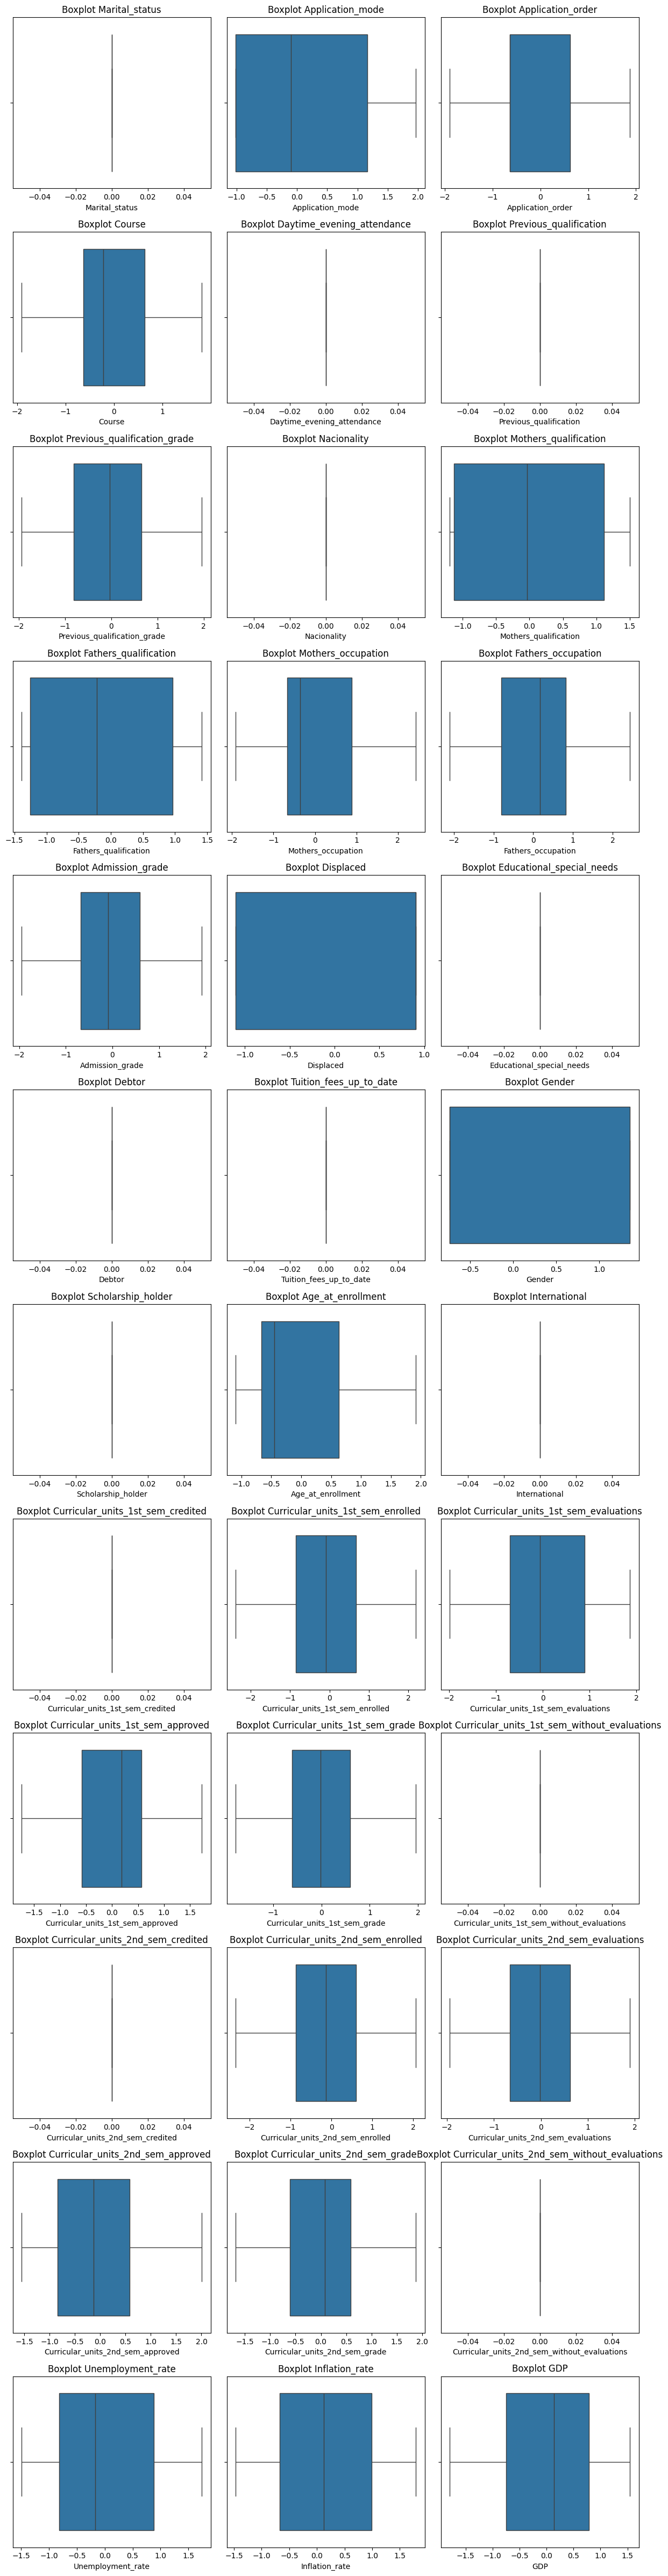

In [14]:
# Fungsi untuk menghapus atau winsorize outlier (IQR)
def remove_outliers_iqr(df, column, multiplier=1.0, method='winsorize'):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    if method == 'remove':
        # Menghapus data yang berada di luar batas IQR
        return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()
    elif method == 'winsorize':
        # Melakukan winsorizing dengan mengganti nilai outlier
        df[column] = df[column].apply(lambda x: np.clip(x, lower_bound, upper_bound))
        return df

def preprocess(df: pd.DataFrame) -> pd.DataFrame:
    # Menentukan kolom numerik (selain kolom target 'Status')
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    numeric_columns = numeric_columns.difference(['Status'])  # Menghindari kolom target

    # Gunakan Winsorizing untuk seluruh kolom numerik (tanpa 'Status')
    for col in numeric_columns:
        df = remove_outliers_iqr(df, col, multiplier=1.0, method='winsorize')  # Memperketat multiplier menjadi 1.0

    # Scaling fitur numerik (kecuali target)
    scaler = StandardScaler()
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

    # Oversampling tiap kelas agar seimbang
    max_class_size = df['Status'].value_counts().max()
    df_balanced = pd.DataFrame()

    for label in df['Status'].unique():
        df_class = df[df['Status'] == label]
        df_upsampled = resample(
            df_class,
            replace=True,
            n_samples=max_class_size,
            random_state=42
        )
        df_balanced = pd.concat([df_balanced, df_upsampled])

    # Acak ulang dan reset index
    df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

    return df_balanced, scaler

# Terapkan preprocessing
df_pre, scaler = preprocess(df)

# Distribusi kelas setelah oversampling
print("\nDistribusi kelas setelah oversampling:\n", df_pre['Status'].value_counts())

# Melihat data pertama setelah preprocessing
print("\nData pertama setelah preprocessing:\n", df_pre.head())

# Visualisasi boxplot untuk melihat outliers setelah penanganan
num_cols = df_pre.select_dtypes(include=[np.number]).columns
n_cols = len(num_cols)
n_rows = (n_cols // 3) + (n_cols % 3 > 0)  # Menyesuaikan jumlah baris

plt.figure(figsize=(12, 4 * n_rows))  # Menyesuaikan ukuran figure berdasarkan jumlah subplot
for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, 3, i)  # Menggunakan jumlah baris yang dinamis
    sns.boxplot(x=df_pre[col])
    plt.title(f'Boxplot {col}')

plt.tight_layout()
plt.show()

## Modeling

**Analisis dan Pemodelan dengan Random Forest**

**Tujuan**  
Model ini dibangun untuk memprediksi kolom *Status* berdasarkan data numerik yang tersedia. Algoritma yang digunakan adalah Random Forest, yaitu metode ensambel berbasis pohon keputusan yang menggabungkan banyak pohon untuk menghasilkan prediksi yang lebih stabil dan akurat.

**Langkah-Langkah yang Dilakukan**

1. **Memisahkan Fitur dan Target**  
   Semua kolom numerik digunakan sebagai fitur (X), sedangkan kolom *Status* digunakan sebagai target (y) yang ingin diprediksi.

2. **Membagi Data**  
   Dataset dibagi menjadi dua bagian:
   - 80% data digunakan untuk pelatihan (training)
   - 20% data digunakan untuk pengujian (testing)

3. **Membangun Model Random Forest**  
   Model dibangun dengan 100 pohon (n_estimators=100) dan pengaturan *class_weight='balanced'* untuk menangani potensi ketidakseimbangan antar kelas.

4. **Melatih Model**  
   Model dilatih dengan data training sehingga dapat mengenali pola-pola penting dari fitur untuk menentukan status yang benar.

5. **Prediksi dan Evaluasi**  
   Setelah dilatih, model digunakan untuk memprediksi status pada data testing. Kinerja model diukur menggunakan metrik akurasi.



In [15]:
# Pisahkan fitur dan target
X = df_pre.drop('Status', axis=1)
y = df_pre['Status']

# Bagi data ke training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Bangun model Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',  # Tambahan jika masih ada ketidakseimbangan kecil
    n_jobs=-1
)

# Latih model
rf_model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = rf_model.predict(X_test)

## Evaluation

**Hasil Evaluasi Model Random Forest**

Setelah pelatihan dan pengujian model Random Forest, berikut adalah hasil evaluasinya:

**Akurasi Keseluruhan:**  
Akurasi model pada data pengujian adalah **94.49%**. Ini menunjukkan bahwa model berhasil memprediksi status dengan tingkat ketepatan yang sangat tinggi terhadap data yang belum pernah dilihat sebelumnya.

**Classification Report**  
Berikut adalah metrik evaluasi untuk masing-masing kelas:

- **Dropout**
  - Precision: 96%
  - Recall: 93%
  - F1-score: 95%

- **Enrolled**
  - Precision: 93%
  - Recall: 94%
  - F1-score: 94%

- **Graduate**
  - Precision: 94%
  - Recall: 96%
  - F1-score: 95%

**Interpretasi:**
- Model memiliki **keseimbangan yang baik** antara precision dan recall untuk ketiga kelas.
- Nilai **F1-score > 0.94** untuk semua kelas mengindikasikan bahwa model tidak hanya akurat, tetapi juga konsisten dalam mengenali masing-masing kategori dengan baik.
- **Recall tinggi** pada kelas *Graduate* (96%) berarti model sangat baik dalam menangkap seluruh data sebenarnya yang termasuk dalam kategori tersebut.
- **Precision tertinggi** pada kelas *Dropout* (96%) menunjukkan bahwa prediksi untuk kelas ini sangat jarang salah.


**Analisis Confusion Matrix:**
- Dari 442 data *Dropout*, hanya 29 kasus salah diklasifikasikan (18 ke *Enrolled*, 11 ke *Graduate*).
- Untuk *Enrolled*, 26 data diklasifikasikan salah (12 ke *Dropout*, 14 ke *Graduate*).
- Untuk *Graduate*, hanya 18 kasus salah (6 ke *Dropout*, 12 ke *Enrolled*).
- Jumlah salah klasifikasi secara keseluruhan cukup kecil, memperkuat bukti bahwa model memiliki performa sangat baik.

**Kesimpulan**
Model Random Forest menunjukkan kinerja yang sangat baik untuk tugas klasifikasi ini. Akurasi tinggi, f1-score seimbang di semua kelas, serta jumlah kesalahan prediksi yang rendah menunjukkan bahwa model sangat dapat diandalkan. Ini menjadikannya pilihan yang tepat untuk digunakan dalam sistem prediktif atau rekomendasi ke depannya.





Akurasi: 0.944947209653092

Classification Report:
               precision    recall  f1-score   support

     Dropout       0.96      0.93      0.95       442
    Enrolled       0.93      0.94      0.94       442
    Graduate       0.94      0.96      0.95       442

    accuracy                           0.94      1326
   macro avg       0.95      0.94      0.94      1326
weighted avg       0.95      0.94      0.94      1326


Confusion Matrix:
 [[413  18  11]
 [ 12 416  14]
 [  6  12 424]]


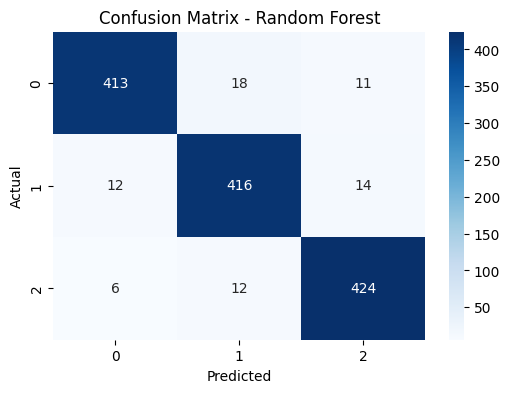

In [16]:
# Evaluasi model
print("\nAkurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


**Evaluasi Akurasi Training vs Testing**

**Akurasi Training:** 100%  
**Akurasi Testing:** 94.49%

**Interpretasi:**

- Model memiliki **akurasi sempurna (100%) pada data training**, yang berarti model berhasil mengklasifikasikan seluruh data pelatihan dengan benar.
- Akurasi pada **data testing sebesar 94.49%**, masih sangat tinggi dan menunjukkan performa generalisasi model yang sangat baik terhadap data baru yang belum pernah dilihat sebelumnya.

**Analisis Performa:**

- Perbedaan akurasi antara training dan testing adalah sekitar **5.5%**, yang tergolong **masih dalam batas wajar**.
- Tidak terlihat gejala **overfitting yang parah**, meskipun akurasi training sangat tinggi. Hal ini bisa terjadi jika data bersih dan fitur sangat relevan terhadap target.
- Model tampaknya mampu **menangkap pola dalam data** dengan sangat baik selama pelatihan, dan tetap **konsisten saat diuji** dengan data baru.

**Kesimpulan:**

Model Random Forest ini memiliki performa yang sangat solid: ia sangat kuat dalam belajar dari data pelatihan tanpa kehilangan kemampuan untuk memprediksi data baru secara akurat. Kombinasi akurasi tinggi di kedua subset data ini menunjukkan bahwa model **sudah terlatih dengan baik dan siap digunakan** dalam aplikasi nyata.


In [17]:
# Akurasi pada data training
train_accuracy = rf_model.score(X_train, y_train)
print("Akurasi pada data training:", train_accuracy)

# Akurasi pada data testing
test_accuracy = rf_model.score(X_test, y_test)
print("Akurasi pada data testing:", test_accuracy)


Akurasi pada data training: 1.0
Akurasi pada data testing: 0.944947209653092


menggunakan feature importance berdasrkan model yang dilatih pada random forest untuk menentukan variabel apa saja yang sangat berpengaruh dan sehingga kita dapat memilih variabel apa yang akan kita gunakan untuk deployment dengan streamlit

                                         Feature  Importance
30             Curricular_units_2nd_sem_approved    0.125486
31                Curricular_units_2nd_sem_grade    0.102462
24             Curricular_units_1st_sem_approved    0.076563
25                Curricular_units_1st_sem_grade    0.068169
29          Curricular_units_2nd_sem_evaluations    0.057866
12                               Admission_grade    0.057166
6                   Previous_qualification_grade    0.047761
19                             Age_at_enrollment    0.046365
23          Curricular_units_1st_sem_evaluations    0.043607
3                                         Course    0.038695
11                            Fathers_occupation    0.037178
10                            Mothers_occupation    0.034664
35                                           GDP    0.031561
8                          Mothers_qualification    0.031090
1                               Application_mode    0.030787
33                      

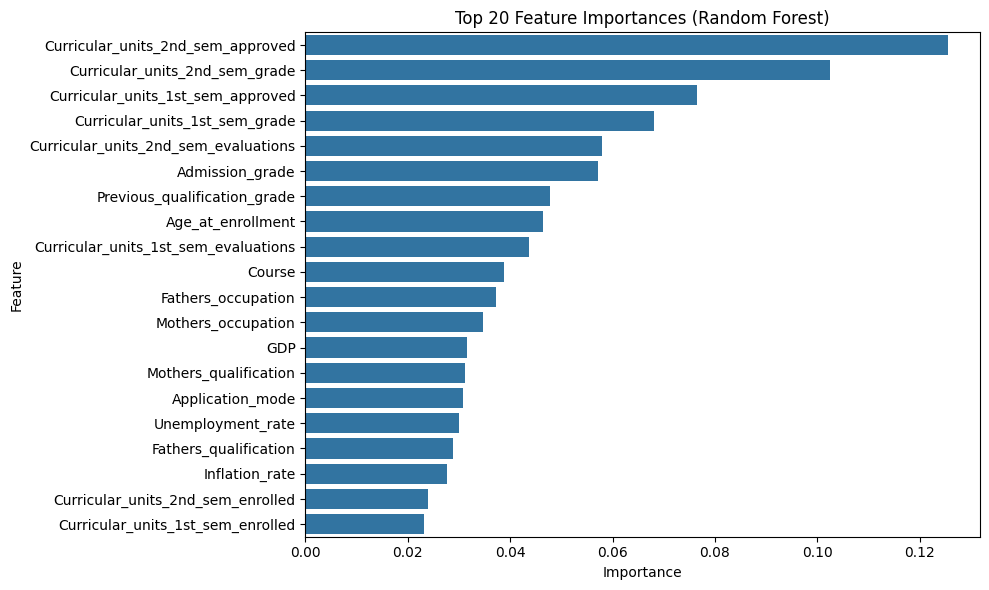

In [18]:
# Ambil importance dan buat DataFrame
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
})

# Urutkan dari yang paling penting
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Tampilkan
print(feature_importances)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(20))  # top 20
plt.title('Top 20 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()


terlihat bahwa ternyata banyak variabel yang tidak penting dan mempengaruhi keputusan pada `Status` siswa, sehingga kita hanya mengambil variabel yang penting dengan syarat > 0.02, dan didapatkan 20 variabel penting, dan ini yang akan kita gunakan dalam deployment dengan streamlit

In [19]:
# Ambil hanya fitur dengan importance > 0.02
selected_features = feature_importances[feature_importances['Importance'] > 0.02]['Feature'].tolist()
selected_features

['Curricular_units_2nd_sem_approved',
 'Curricular_units_2nd_sem_grade',
 'Curricular_units_1st_sem_approved',
 'Curricular_units_1st_sem_grade',
 'Curricular_units_2nd_sem_evaluations',
 'Admission_grade',
 'Previous_qualification_grade',
 'Age_at_enrollment',
 'Curricular_units_1st_sem_evaluations',
 'Course',
 'Fathers_occupation',
 'Mothers_occupation',
 'GDP',
 'Mothers_qualification',
 'Application_mode',
 'Unemployment_rate',
 'Fathers_qualification',
 'Inflation_rate',
 'Curricular_units_2nd_sem_enrolled',
 'Curricular_units_1st_sem_enrolled']

lalu kita save model nya berdasarkan feature importance yang sudah dipilih

In [20]:
import joblib

# Simpan model dan fitur terpilih
joblib.dump({'model': rf_model, 'features': selected_features}, 'model_rf.pkl')

['model_rf.pkl']

Digunakan untuk membuat file requirements.txt

In [21]:
!pip install nbconvert pipreqs

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.3/798.3 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.5 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=51d7e48f1a6d4e86e590fca9462f7dabdca2f2ea3b88536d4b6596a1fec6948d
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built docopt
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.12.3 which is incompatible.


In [22]:
# 1. Konversi notebook (misal pipeline.ipynb) jadi .py
!jupyter nbconvert --to script student_problem.ipynb --output sp

[NbConvertApp] Converting notebook student_problem.ipynb to script
[NbConvertApp] Writing 21240 bytes to sp.txt


In [23]:
!sed '/^[!%]/d' sp.txt > sp_clean.py

In [24]:
!pipreqs . --force --savepath requirements.txt

INFO: Not scanning for jupyter notebooks.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in requirements.txt


In [25]:
!cat requirements.txt

joblib==1.4.2
matplotlib==3.10.1
numpy==2.2.5
pandas==2.2.3
scikit_learn==1.6.1
scipy==1.15.2
seaborn==0.13.2
